In [143]:
import numpy as np

from matrix_computations_helper import plot_matrices

## Algorithm 1.2.2 Banded Storage Gaxpy
The banded matrix $A$ with upper bandwidth $q$ and lower bandwidth $p$. It can be stored in $A.band$ in banded storage.
$$
a_{ij} = A.band(i - j + q + 1, j)
$$

### Create a banded matrix

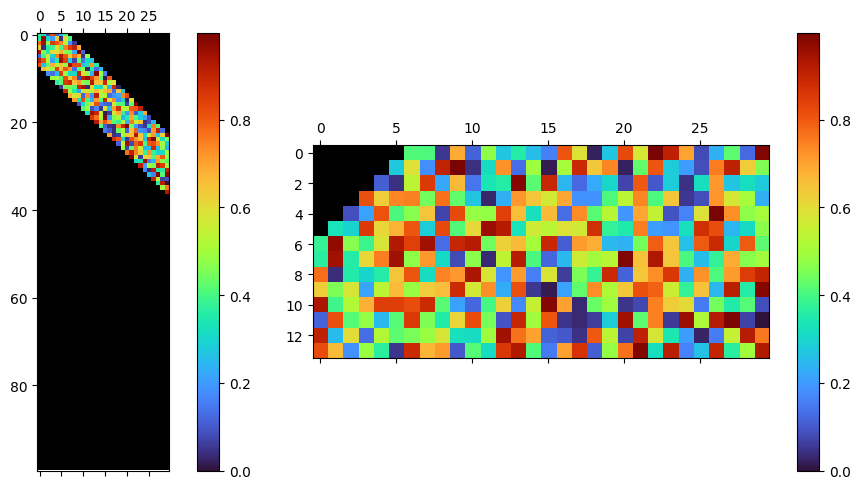

In [144]:
upper_bandwidth = 6
lower_bandwidth = 7
m, n = 100, 30

# Construct a matrix with only non-zero elements on the band
A = np.random.rand(m, n)
A = np.tril(A, upper_bandwidth)
A = np.triu(A, -lower_bandwidth)

# Store it in band storage
w = min(m + upper_bandwidth, n) if m < n else n
A_band = np.zeros((lower_bandwidth + upper_bandwidth + 1, w))
for j in range(w):
    a1 = min(m, max(0, j - upper_bandwidth))
    a2 = min(m, j + lower_bandwidth + 1)
    b1 = max(0, upper_bandwidth - j)
    b2 = b1 + a2 - a1
    A_band[b1:b2, j] = A[a1:a2, j]

plot_matrices([A, A_band], (1, 2), (12, 5))

### Implement and test the algorithm

In [145]:
def band_gaxpy(upper_bandwidth, lower_bandwidth, A_band, x, y):
    m, n = y.shape[0], x.shape[0]
    w = min(m + upper_bandwidth, n) if m < n else n
    for j in range(w):
        a1 = min(m, max(0, j - upper_bandwidth))
        a2 = min(m, j + lower_bandwidth + 1)
        b1 = max(0, upper_bandwidth - j)
        b2 = b1 + a2 - a1
        y[a1:a2] = y[a1:a2] + A_band[b1:b2, j] * x[j]

x = np.random.rand(n)
y_correct = A @ x
y = np.zeros(m)
band_gaxpy(upper_bandwidth, lower_bandwidth, A_band, x, y)

print(np.allclose(y, y_correct))

True
